# Chapter 7: Multivariate Linear Regression Models

## 7.2 - The Classical Linear Regression

The term linear refers to the fact that the mean is a linear function of the unknown parameters $a$.

With $n$ idenpendent observations on $Y$:


$Y_1$ = $a_0$ + $a_{1} x_{11}$ + ... + $a_{n} x_{1r}$ + $\epsilon_1$

$Y_2$ = $a_0$ + $a_{1} x_{21}$ + ... + $a_{n} x_{2r}$ + $\epsilon_2$

...

$Y_n$ = $a_0$ + $a_{1} x_{n1}$ + ... + $a_{n} x_{nr}$ + $\epsilon_n$

In matrix notation:

\begin{gather}
\begin{bmatrix}
Y_1 \\ Y_2 \\ \vdots \\ Y_n
\end{bmatrix}
=
  \begin{bmatrix}
   1 & x_{11} & x_{12} & ... & x_{1r} \\
   1 & x_{21} & x_{22} & ... & x_{2r} \\
   \vdots & \vdots & \vdots & \ddots & \vdots \\
   1 & x_{n1} & x_{n2} & ... & x_{nr}
   \end{bmatrix}   
   \begin{bmatrix}
   a_0 \\ a_1 \\ \vdots \\ a_n
   \end{bmatrix}
   +
   \begin{bmatrix}
   \epsilon_0 \\ \epsilon_1 \\ \vdots \\ \epsilon_n
   \end{bmatrix} 
\end{gather}

$$ \mathbf{Y} = \mathbf{x} \mathbf{a} + \mathbf{\epsilon}$$

# Import libraries

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [74]:
df = pd.read_csv('real_estate.csv')
y = df.iloc[:,-1:]
y.columns = ['Y']
x = df.copy()
x = df.drop(df.columns[[0,-1]], axis=1)
x.columns = [f'x{i}' for i in range(1,7)]

In [76]:
x.head()

,x1,x2,x3,x4,x5,x6
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [93]:
scaler = StandardScaler()
xnorm = scaler.fit_transform(x)

In [95]:
xnorm

array([[-0.82368321,  1.25562833, -0.79249504,  2.00740743,  1.12542986,
         0.44876222],
       [-0.82368321,  0.15708622, -0.61661163,  1.66750286,  0.91244418,
         0.40113894],
       [ 1.54115111, -0.38779067, -0.41401527,  0.30788458,  1.48686011,
         0.68818339],
       ...,
       [ 0.35873395,  0.09556786, -0.54967846,  0.98769372,  0.82289338,
         0.42397202],
       [-0.52896662, -0.84478419, -0.77668389,  0.30788458, -0.18475479,
         0.4768143 ],
       [ 1.24643452, -0.98539758, -0.78807071,  1.66750286,  0.42757905,
         0.63534112]])

In [94]:
y.head()

,Y
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [104]:
linreg = LinearRegression()

In [105]:
regression = linreg.fit(xnorm, y)

In [106]:
a = regression.coef_

In [107]:
intercept = regression.intercept_

In [108]:
a

array([[ 1.449314  , -3.06878822, -5.65682337,  3.33410316,  2.79478248,
        -0.19043687]])

In [109]:
intercept

array([37.98019324])

In [110]:
r2_score = regression.score(xnorm, y) 

In [111]:
r2_score

0.5823704472723072

## Residuals

In [120]:
y_pred = regression.predict(xnorm)

In [154]:
residuals = y - y_pred
res_mean = residuals.mean()[0]
res_std = residuals.std()[0]

In [158]:
f'Mean = {res_mean:2.1f}, Std = {res_std:1.1f}'

'Mean = 0.0, Std = 8.8'

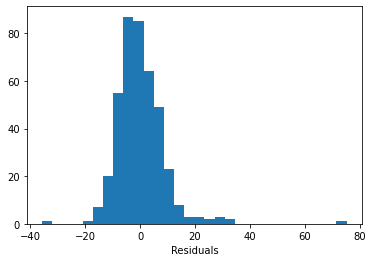

In [134]:
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.show()

Text(0.5, 0, 'Predicted y')

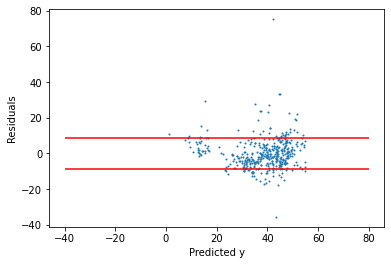

In [167]:
plt.scatter(y_pred, residuals, s=1)
plt.hlines(y=res_mean+res_std, xmin=-40, xmax=80, color='red')
plt.hlines(y=res_mean-res_std, xmin=-40, xmax=80, color='red')
plt.ylabel('Residuals')
plt.xlabel('Predicted y')

In [174]:
xnorm_df = pd.DataFrame(xnorm, columns = [f'x{i}' for i in range(1,7)])

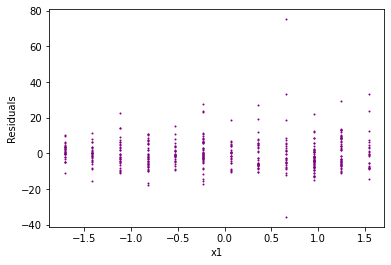

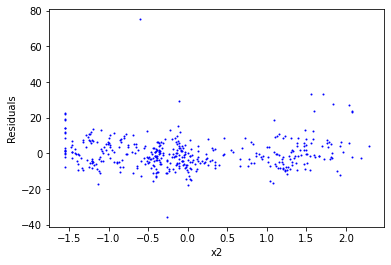

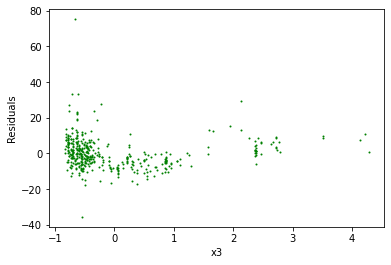

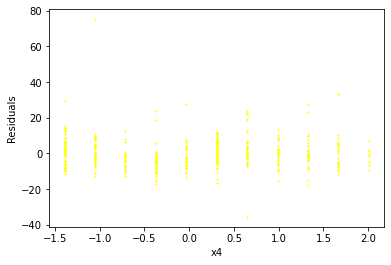

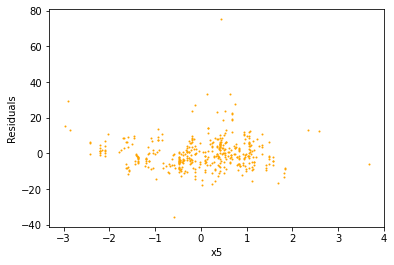

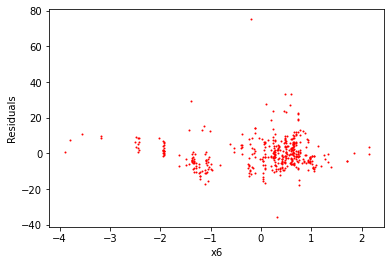

In [188]:
colors = ['purple','blue','green','yellow','orange','red']
for i,col in enumerate(xnorm_df.columns):
    plt.scatter(xnorm_df[col], residuals, s=1, color=colors[i])
    plt.ylabel('Residuals')
    plt.xlabel(col)
    plt.show()

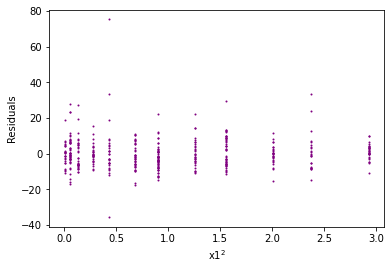

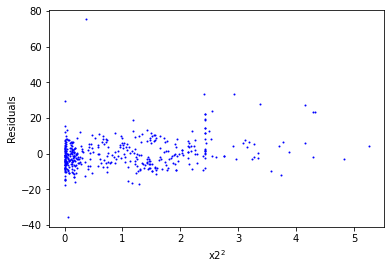

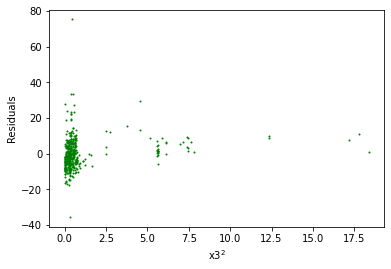

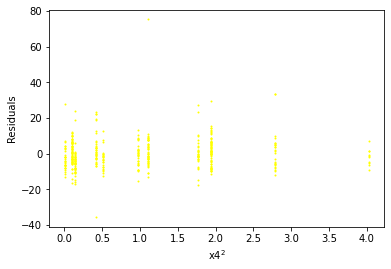

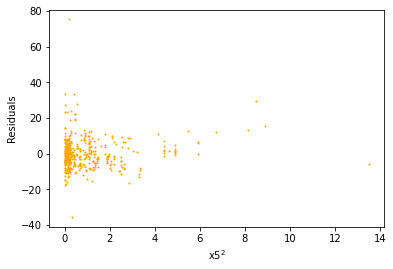

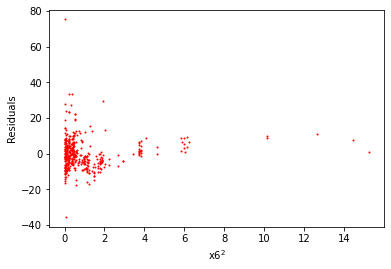

In [190]:
colors = ['purple','blue','green','yellow','orange','red']
for i,col in enumerate(xnorm_df.columns):
    plt.scatter(xnorm_df[col]*xnorm_df[col], residuals, s=1, color=colors[i])
    plt.ylabel('Residuals')
    plt.xlabel(f'{col}$^2$')
    plt.show()